In [1]:
from transformers import AutoModel
from utils import *

/home/venky/anaconda3/envs/srmri/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Model Call and Uncertainty Quantification

The code block, uses helpers from the utils file, 
* to read HR and LR image.
* pre-process the LR image to be upsampled
* loads a model from HF Hub
* upsamples the LR image
* computes the uncertainty using Monte Carlo Dropout method
* generates a comparison plot

In [2]:

datadir="/home/venky/LANShareDownloads/12cp clean code/DATA/IXI-T1" 
scan = "IXI504-Guys-1025-T1.nii.gz"
fold="2d5fold"
model_card_name = "venkatesh-thiru/SRMRI_UNetMSS_Cross_Scale_IXIT1"
patch_size=64
overlap_sizes=10
batch_size = 7

subject, grid_sampler, patch_loader, aggregator = read_and_patch(datadir, scan, fold, patch_size, overlap_sizes, batch_size)
model = AutoModel.from_pretrained(model_card_name, trust_remote_code=True).cuda()

aggregator_out = super_sample(model, patch_loader, aggregator)
final_image = aggregator_out.get_output_tensor()
mean_map, variance_map = compute_uncertainty(model, patch_loader, aggregator)

100%|██████████| 10/10 [01:02<00:00,  6.21s/it]


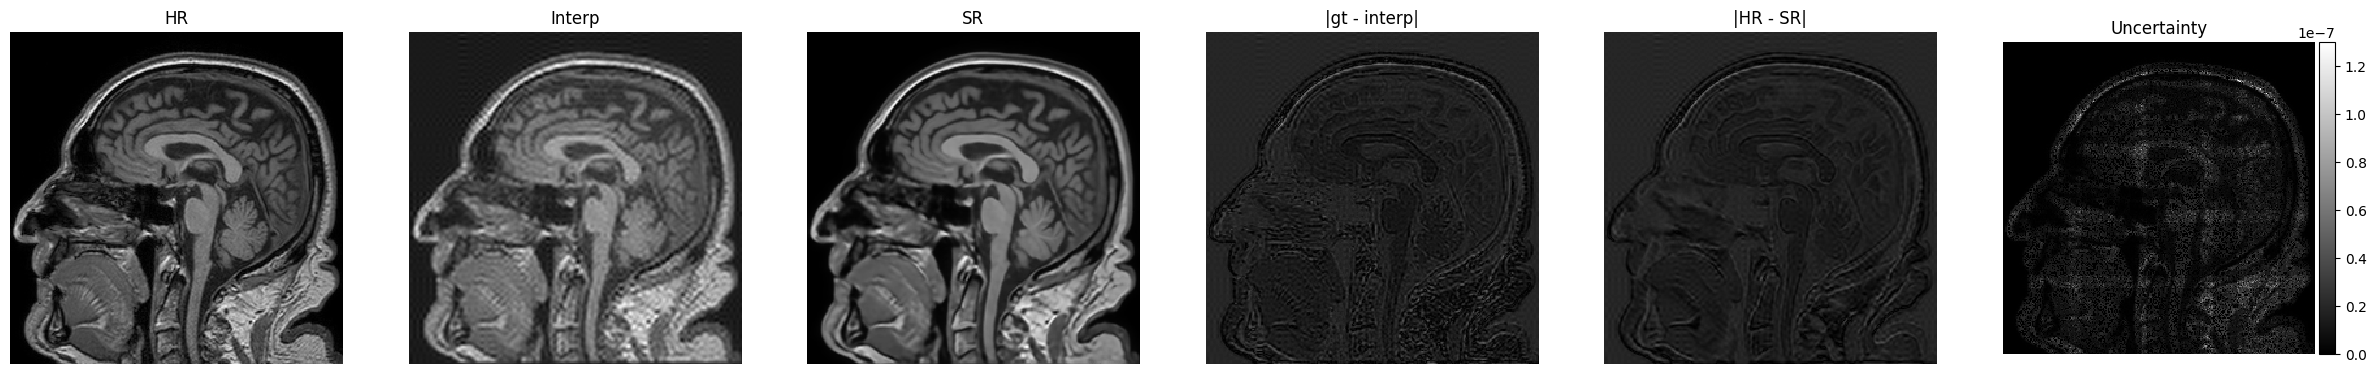

In [3]:
make_comparison_plot(subject, final_image, variance_map)